In [182]:
import os, shutil
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np

In [183]:
base_dir = "C:/Users/Hermi/Desktop/Generated_Doodles/"

validation_dir = os.path.join(base_dir, 'validation')
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')


In [184]:
categories = ["cruise_ship", "dragon", "giraffe", "hammer", "lion",
                     "monkey", "ocean", "panda", "penguin", "shark", 
                     "snake", "spider", "tiger", "whale", "zebra"]

# 100 train, 50 validation, 70 test
train_cruise_ship_dir = os.path.join(train_dir, "cruise_ship").replace("\\","/")
train_dragon_dir = os.path.join(train_dir, "dragon").replace("\\","/")
train_giraffe_dir = os.path.join(train_dir, "giraffe").replace("\\","/")
train_hammer_dir = os.path.join(train_dir, "hammer").replace("\\","/")
train_lion_dir = os.path.join(train_dir, "lion").replace("\\","/")
train_monkey_dir = os.path.join(train_dir, "monkey").replace("\\","/")
train_ocean_dir = os.path.join(train_dir, "ocean").replace("\\","/")
train_panda_dir = os.path.join(train_dir, "panda").replace("\\","/")
train_penguin_dir = os.path.join(train_dir, "penguin").replace("\\","/")
train_shark_dir = os.path.join(train_dir, "shark").replace("\\","/")
train_snake_dir = os.path.join(train_dir, "snake").replace("\\","/")
train_spider_dir = os.path.join(train_dir, "spider").replace("\\","/")
train_tiger_dir = os.path.join(train_dir, "tiger").replace("\\","/")
train_whale_dir = os.path.join(train_dir, "whale").replace("\\","/")
train_zebra_dir = os.path.join(train_dir, "zebra").replace("\\","/")

test_cruise_ship_dir = os.path.join(test_dir, "cruise_ship").replace("\\","/")
test_dragon_dir = os.path.join(test_dir, "dragon").replace("\\","/")
test_giraffe_dir = os.path.join(test_dir, "giraffe").replace("\\","/")
test_hammer_dir = os.path.join(test_dir, "hammer").replace("\\","/")
test_lion_dir = os.path.join(test_dir, "lion").replace("\\","/")
test_monkey_dir = os.path.join(test_dir, "monkey").replace("\\","/")
test_ocean_dir = os.path.join(test_dir, "ocean").replace("\\","/")
test_panda_dir = os.path.join(test_dir, "panda").replace("\\","/")
test_penguin_dir = os.path.join(test_dir, "penguin").replace("\\","/")
test_shark_dir = os.path.join(test_dir, "shark").replace("\\","/")
test_snake_dir = os.path.join(test_dir, "snake").replace("\\","/")
test_spider_dir = os.path.join(test_dir, "spider").replace("\\","/")
test_tiger_dir = os.path.join(test_dir, "tiger").replace("\\","/")
test_whale_dir = os.path.join(test_dir, "whale").replace("\\","/")
test_zebra_dir = os.path.join(test_dir, "zebra").replace("\\","/")

validation_cruise_ship_dir = os.path.join(validation_dir, "cruise_ship").replace("\\","/")
validation_dragon_dir = os.path.join(validation_dir, "dragon").replace("\\","/")
validation_giraffe_dir = os.path.join(validation_dir, "giraffe").replace("\\","/")
validation_hammer_dir = os.path.join(validation_dir, "hammer").replace("\\","/")
validation_lion_dir = os.path.join(validation_dir, "lion").replace("\\","/")
validation_monkey_dir = os.path.join(validation_dir, "monkey").replace("\\","/")
validation_ocean_dir = os.path.join(validation_dir, "ocean").replace("\\","/")
validation_panda_dir = os.path.join(validation_dir, "panda").replace("\\","/")
validation_penguin_dir = os.path.join(validation_dir, "penguin").replace("\\","/")
validation_shark_dir = os.path.join(validation_dir, "shark").replace("\\","/")
validation_snake_dir = os.path.join(validation_dir, "snake").replace("\\","/")
validation_spider_dir = os.path.join(validation_dir, "spider").replace("\\","/")
validation_tiger_dir = os.path.join(validation_dir, "tiger").replace("\\","/")
validation_whale_dir = os.path.join(validation_dir, "whale").replace("\\","/")
validation_zebra_dir = os.path.join(validation_dir, "zebra").replace("\\","/")

Label:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


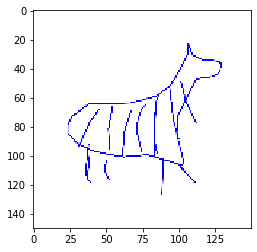

Label:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


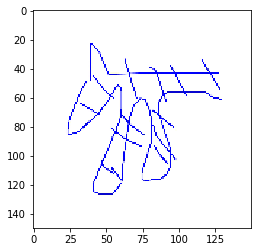

Label:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


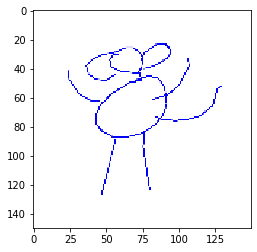

In [65]:
# count = 0

# for data_batch, labels_batch in train_generator:
# #     print('data batch shape: ', data_batch.shape)
# #     print('labels batch shape: ', labels_batch.shape)

#     img = data_batch[0].astype(np.uint8)
#     plt.imshow(img)
#     print('Label: ', labels_batch[0])
#     plt.pause(3)
#     count+=1
#     if count == 3:
#         break

In [189]:
class FixedImageDataGenerator(ImageDataGenerator):
    def standardize(self, x):
        if self.featurewise_center:
            x = ((x/255.) - 0.5) * 2.
        return x

In [ ]:
train_datagen = FixedImageDataGenerator(1./255)
validation_datagen = FixedImageDataGenerator(1./255)

In [ ]:
# no agumentation or transfer learning 

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                   target_size = (150, 150), 
                                                   batch_size = 10, 
                                                   class_mode = 'categorical')

validation_generator = validation_datagen.flow_from_directory(validation_dir, 
                                                              target_size = (150, 150), 
                                                              batch_size = 10, 
                                                              class_mode = 'categorical')


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(15, activation = 'softmax')
])

model.summary()

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = 0.001), 
              loss = "categorical_crossentropy", metrics = ['accuracy'])

history = model.fit(train_generator,
                    steps_per_epoch = 150,
                    epochs = 10,
                    validation_data = validation_generator,
                    validation_steps = 75)

In [212]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 18496)           

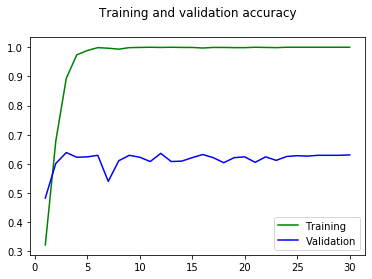

In [193]:
# train and validation accuracy by epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label = 'Training', color = 'green')
plt.plot(epochs, val_acc, 'b', label = 'Validation')
plt.title('Training and validation accuracy\n')
plt.legend(loc = 4)
plt.savefig("Train_and_val_acc_original_10_epoch.jpg")

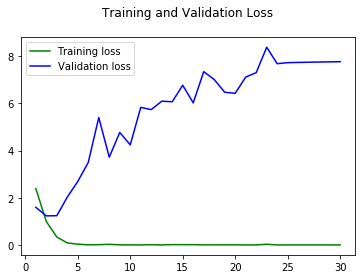

In [194]:
# train and validation loss by epoch

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label = 'Training loss', color = 'green')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss\n')
plt.legend()
plt.savefig("Train_and_val_loss_original_10_epoch.jpg")

In [195]:
# data agumentation applied to our dataset and dropout of 0.5

train_datagen_2 = FixedImageDataGenerator(rescale = 1./255, 
                                   rotation_range = 40, 
                                   width_shift_range = 0.2, 
                                   zoom_range = 0.2,  
                                   shear_range = 0.2,
                                   horizontal_flip = True)

train_generator_2 = train_datagen_2.flow_from_directory(train_dir, 
                                                   target_size = (150, 150),
                                                   batch_size = 10, 
                                                   class_mode = 'categorical')

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(15, activation = 'softmax')
])

model_2.summary()
    
model_2.compile(optimizer = tf.keras.optimizers.RMSprop(lr = 0.001), 
              loss = "categorical_crossentropy", metrics = ['accuracy'])
    
history = model_2.fit(train_generator,
                    steps_per_epoch = 150,
                    epochs = 10,
                    validation_data = validation_generator,
                    validation_steps = 75)

Found 1500 images belonging to 15 classes.
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_17

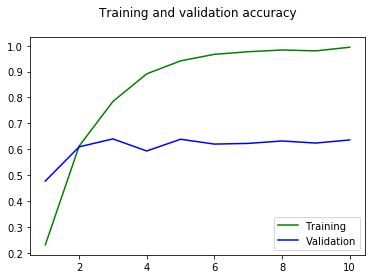

In [196]:
# train and validation accuracy by epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label = 'Training', color = 'green')
plt.plot(epochs, val_acc, 'b', label = 'Validation')
plt.title('Training and validation accuracy\n')
plt.legend(loc = 4)
plt.savefig("Train_and_val_acc_augmented.jpg")

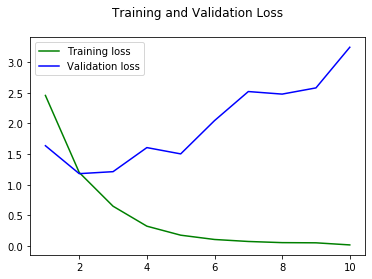

In [197]:
# train and validation loss by epoch

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label = 'Training loss', color = 'green')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss\n')
plt.legend()
plt.savefig("Train_and_val_loss_augmented.jpg")

In [198]:
# Transfer Learning using VGG19 for feature extraction

from tensorflow.keras.applications import VGG19

conv_base = VGG19(weights = 'imagenet', 
                  include_top = False, 
                  input_shape = (150, 150, 3))

datagen = FixedImageDataGenerator(rescale = 1./255)
batch_size = 20

def extract_features(directory, sample_count):
    
    features = np.zeros((sample_count, 4, 4, 512))
    labels = np.zeros((sample_count, 15))
    generator = datagen.flow_from_directory(directory, 
                                           target_size = (150, 150),
                                           batch_size = batch_size,
                                           class_mode = "categorical")
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i*batch_size : (i+1)*batch_size] = features_batch
        labels[i*batch_size : (i+1)*batch_size] = labels_batch
        
        print("i is: ", i)
        i += 1
        if i * batch_size >= sample_count:
            break
            
    return features, labels


In [204]:
train_features, train_labels = extract_features(train_dir, 1500)

Found 1500 images belonging to 15 classes.
i is:  0
i is:  1
i is:  2
i is:  3
i is:  4
i is:  5
i is:  6
i is:  7
i is:  8
i is:  9
i is:  10
i is:  11
i is:  12
i is:  13
i is:  14
i is:  15
i is:  16
i is:  17
i is:  18
i is:  19
i is:  20
i is:  21
i is:  22
i is:  23
i is:  24
i is:  25
i is:  26
i is:  27
i is:  28
i is:  29
i is:  30
i is:  31
i is:  32
i is:  33
i is:  34
i is:  35
i is:  36
i is:  37
i is:  38
i is:  39
i is:  40
i is:  41
i is:  42
i is:  43
i is:  44
i is:  45
i is:  46
i is:  47
i is:  48
i is:  49
i is:  50
i is:  51
i is:  52
i is:  53
i is:  54
i is:  55
i is:  56
i is:  57
i is:  58
i is:  59
i is:  60
i is:  61
i is:  62
i is:  63
i is:  64
i is:  65
i is:  66
i is:  67
i is:  68
i is:  69
i is:  70
i is:  71
i is:  72
i is:  73
i is:  74


In [ ]:
validation_features, validation_labels = extract_features(validation_dir, 750)

In [203]:
test_features, test_labels = extract_features(test_dir, 900)

Found 900 images belonging to 15 classes.
i is:  0
i is:  1
i is:  2
i is:  3
i is:  4
i is:  5
i is:  6
i is:  7
i is:  8
i is:  9
i is:  10
i is:  11
i is:  12
i is:  13
i is:  14
i is:  15
i is:  16
i is:  17
i is:  18
i is:  19
i is:  20
i is:  21
i is:  22
i is:  23
i is:  24
i is:  25
i is:  26
i is:  27
i is:  28
i is:  29
i is:  30
i is:  31
i is:  32
i is:  33
i is:  34
i is:  35
i is:  36
i is:  37
i is:  38
i is:  39
i is:  40
i is:  41
i is:  42
i is:  43
i is:  44


In [209]:
train_features = np.reshape(train_features, (1500, 4*4*512))
validation_features = np.reshape(validation_features, (750, 4*4*512))
test_features = np.reshape(test_features, (900, 4*4*512))

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation = 'relu', input_dim = 4*4*512),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(15, activation = 'softmax')
])

model_3.summary()

model_3.compile(optimizer = tf.keras.optimizers.RMSprop(lr = 0.01),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

history = model_3.fit(train_features, train_labels, 
                     epochs = 100, 
                     batch_size = 20,
                     validation_data = (validation_features, validation_labels))


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 15)                3855      
Total params: 2,101,263
Trainable params: 2,101,263
Non-trainable params: 0
_________________________________________________________________
Train on 1500 samples, validate on 750 samples
Epoch 1/100
1500/1500 [==============================] - 3s 2ms/sample - loss: 33.4587 - accuracy: 0.3247 - val_loss: 3.4944 - val_accuracy: 0.3707
Epoch 2/100
1500/1500 [==============================] - 2s 2ms/sample - loss: 4.5350 - accuracy: 0.2913 - val_loss: 2.0941 - val_accuracy: 0.4107
Epoch 3/100
1500/1500 [========

Epoch 51/100
1500/1500 [==============================] - 2s 1ms/sample - loss: 1.8825 - accuracy: 0.4933 - val_loss: 2.8584 - val_accuracy: 0.5147
Epoch 52/100
1500/1500 [==============================] - 2s 1ms/sample - loss: 1.8720 - accuracy: 0.4773 - val_loss: 3.4174 - val_accuracy: 0.5253
Epoch 53/100
1500/1500 [==============================] - 2s 2ms/sample - loss: 1.9155 - accuracy: 0.4887 - val_loss: 3.8755 - val_accuracy: 0.5200
Epoch 54/100
1500/1500 [==============================] - 2s 1ms/sample - loss: 1.6697 - accuracy: 0.4933 - val_loss: 4.3175 - val_accuracy: 0.5347
Epoch 55/100
1500/1500 [==============================] - 2s 1ms/sample - loss: 2.2043 - accuracy: 0.4840 - val_loss: 5.9545 - val_accuracy: 0.5253
Epoch 56/100
1500/1500 [==============================] - 3s 2ms/sample - loss: 1.6157 - accuracy: 0.4687 - val_loss: 3.3248 - val_accuracy: 0.5213
Epoch 57/100
1500/1500 [==============================] - 2s 1ms/sample - loss: 1.7187 - accuracy: 0.4827 - val_

In [214]:
model_3.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 15)                3855      
Total params: 2,101,263
Trainable params: 2,101,263
Non-trainable params: 0
_________________________________________________________________


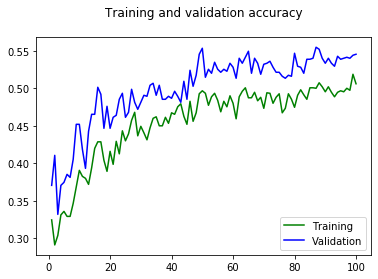

In [210]:
# train and validation accuracy by epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label = 'Training', color = 'green')
plt.plot(epochs, val_acc, 'b', label = 'Validation')
plt.title('Training and validation accuracy\n')
plt.legend(loc = 4)
plt.savefig("Train_and_val_acc_transfer_learning_VGG19.jpg")

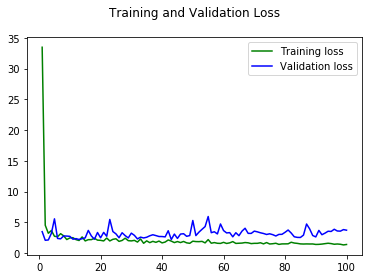

In [211]:
# train and validation loss by epoch

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label = 'Training loss', color = 'green')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss\n')
plt.legend()
plt.savefig("Train_and_val_loss_transfer_learning_VGG19.jpg")

In [ ]:
test_acc = 